In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline



In [2]:
data=pd.read_csv('../data_ifes.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3791 non-null   object 
 1   data_publicacao      3791 non-null   object 
 2   diretoria            3791 non-null   object 
 3   numero_revista       3791 non-null   int64  
 4   codigo               3791 non-null   float64
 5   titulo               3791 non-null   object 
 6   numero               3791 non-null   object 
 7   data_deposito        3791 non-null   object 
 8   data_prioridade      4 non-null      object 
 9   cod_prioridade       4 non-null      object 
 10  classif_internacion  3728 non-null   object 
 11  classif_nacion       2516 non-null   object 
 12  titulo_inid          3791 non-null   object 
 13  titular_nome         3791 non-null   object 
 14  titular_uf           3782 non-null   object 
 15  titular_pais         3791 non-null   o

In [3]:
data_analise_ci=data[['titular_1','titular_uf1','classif_internacion']]
df_classificacao_internacional=data_analise_ci['classif_internacion'].str.split(";",expand=True)
df_classificacao_internacional.columns = ['class_int' + str(i) for i in range(1, df_classificacao_internacional.shape[1] + 1)]
data_analiseCI=pd.concat([data_analise_ci, df_classificacao_internacional], axis=1).drop(columns=['classif_internacion'])
data_analiseCI.head()

,titular_1,titular_uf1,class_int1,class_int2,class_int3,class_int4,class_int5,class_int6,class_int7,class_int8,...,class_int37,class_int38,class_int39,class_int40,class_int41,class_int42,class_int43,class_int44,class_int45,class_int46
0,UNIVERSIDADE FEDERAL DO CEARÁ,CE,H01Q 13/10,H01Q 1/24,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,FUNDAÇÃO UNIVERSIDADE DO AMAZONAS,AM,H04L 29/06,H04L 29/12,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",PE,G01D 3/08,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",GO,A21D 13/045,A21D 13/047,A21D 13/066,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,MG,C12Q 1/68,C12R 1/01,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
ipc_table=pd.read_excel('ipc_technology.xlsx')
ipc_table_tratado=ipc_table[['Sector_en','Field_en','IPC_code']]
ipc_table_tratado[['IPC1','IPC2']]=ipc_table_tratado['IPC_code'].str.split('/',expand=True,n=2)
mapeamento_area_tecnologica=dict(zip(ipc_table_tratado['IPC1'],ipc_table_tratado['Field_en']))
mapeamento_area_tecnologica = {k.strip(): v.strip() for k, v in mapeamento_area_tecnologica.items()}


In [5]:
def generate_counter_df(data_analiseCI):
    contador_list = [data_analiseCI[i].value_counts() for i in data_analiseCI.columns[2:]]

    data = []

    # Preencher a lista com os dados
    for series in contador_list:
        for value, count in series.items():
            data.append([value, count])

    # Criar o DataFrame usando a lista
    df_contador = pd.DataFrame(data, columns=['IPC', 'Contagem'])
    df_contador['IPC'] = df_contador['IPC'].str.lstrip()
    df_contador[['IPC1','IPC2']]=df_contador['IPC'].str.split(' ',expand=True,n=2)
    df_contador['Porcentagem']=round((df_contador['Contagem']/df_contador['Contagem'].sum())*100, 2)  
    df_contador['Area']=df_contador['IPC1'].map(mapeamento_area_tecnologica)
    return df_contador[['IPC','IPC1','Area','Contagem','Porcentagem']]

In [6]:
def generate_campo_tecnologico(df_contador):
    campo_tecnologico = df_contador[['Contagem','Porcentagem']].groupby(df_contador['Area']).sum().sort_values(by=['Contagem'],ascending=False)
    campo_tecnologico=campo_tecnologico.reset_index()
    return campo_tecnologico

In [21]:
df_contador=generate_counter_df(data_analiseCI)
df_contador.head()

,IPC,IPC1,Area,Contagem,Porcentagem
0,A61K 36/185,A61K,Pharmaceuticals,35,0.32
1,G01N 33/569,G01N,Analysis of biological materials,30,0.28
2,C07K 7/08,C07K,Biotechnology,28,0.26
3,A23L 19/00,A23L,Food chemistry,22,0.20
4,A23B 7/02,A23B,Food chemistry,20,0.18


In [8]:
area_tecnologica=generate_campo_tecnologico(df_contador)
area_tecnologica.head(5)
    

,Area,Contagem,Porcentagem
0,Pharmaceuticals,2474,24.14
1,Biotechnology,998,9.79
2,Food chemistry,970,9.47
3,Basic materials chemistry,738,7.29
4,Medical technology,578,5.73


### Gráfico Área Tecnológica (Todas as Instituições)

## Área Tecnológica por Institutos Federais: Brasil






In [9]:
data_analiseCI_IF=data_analiseCI[data_analiseCI['titular_1'].str.contains('^INSTITUTO')]
data_analiseCI_IF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 2 to 3786
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titular_1    403 non-null    object
 1   titular_uf1  402 non-null    object
 2   class_int1   392 non-null    object
 3   class_int2   271 non-null    object
 4   class_int3   166 non-null    object
 5   class_int4   85 non-null     object
 6   class_int5   49 non-null     object
 7   class_int6   26 non-null     object
 8   class_int7   15 non-null     object
 9   class_int8   8 non-null      object
 10  class_int9   3 non-null      object
 11  class_int10  2 non-null      object
 12  class_int11  2 non-null      object
 13  class_int12  1 non-null      object
 14  class_int13  1 non-null      object
 15  class_int14  1 non-null      object
 16  class_int15  0 non-null      object
 17  class_int16  0 non-null      object
 18  class_int17  0 non-null      object
 19  class_int18  0 non-null      obje

In [10]:
df_contadorIF=generate_counter_df(data_analiseCI_IF)
df_contadorIF.head()


,IPC,IPC1,Area,Contagem,Porcentagem
0,A21D 13/80,A21D,Food chemistry,5,0.49
1,C12C 12/00,C12C,Food chemistry,4,0.39
2,G09B 23/32,G09B,Control,3,0.29
3,A61K 35/644,A61K,Pharmaceuticals,3,0.29
4,A23G 3/46,A23G,Food chemistry,3,0.29


In [19]:
area_tecnologicaIF=generate_campo_tecnologico(df_contadorIF)
area_tecnologicaIF.head()


,Area,Contagem,Porcentagem
0,Food chemistry,129,12.85
1,Pharmaceuticals,96,9.57
2,Basic materials chemistry,86,8.58
3,Other special machines,85,8.49
4,Medical technology,60,5.99


In [12]:
data_analiseCI_UV=data_analiseCI[data_analiseCI['titular_1'].str.contains('UNIVERSIDADE')]
data_analiseCI_UV.info()
    

<class 'pandas.core.frame.DataFrame'>
Index: 3176 entries, 0 to 3790
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titular_1    3176 non-null   object
 1   titular_uf1  3168 non-null   object
 2   class_int1   3126 non-null   object
 3   class_int2   2448 non-null   object
 4   class_int3   1587 non-null   object
 5   class_int4   884 non-null    object
 6   class_int5   462 non-null    object
 7   class_int6   238 non-null    object
 8   class_int7   137 non-null    object
 9   class_int8   81 non-null     object
 10  class_int9   53 non-null     object
 11  class_int10  32 non-null     object
 12  class_int11  21 non-null     object
 13  class_int12  13 non-null     object
 14  class_int13  11 non-null     object
 15  class_int14  8 non-null      object
 16  class_int15  7 non-null      object
 17  class_int16  6 non-null      object
 18  class_int17  5 non-null      object
 19  class_int18  5 non-null      obj

## Área Tecnológica por Universidades Federais: Brasil

In [13]:
df_contadorUV=generate_counter_df(data_analiseCI_UV)
df_contadorUV.head()

,IPC,IPC1,Area,Contagem,Porcentagem
0,A61K 36/185,A61K,Pharmaceuticals,33,0.36
1,G01N 33/569,G01N,Analysis of biological materials,30,0.33
2,C07K 7/08,C07K,Biotechnology,26,0.28
3,A23L 19/00,A23L,Food chemistry,21,0.23
4,A23B 7/02,A23B,Food chemistry,18,0.20


In [14]:
area_tecnologicaUV=generate_campo_tecnologico(df_contadorUV)
area_tecnologicaUV.head(5)

,Area,Contagem,Porcentagem
0,Pharmaceuticals,2275,23.42
1,Biotechnology,901,9.24
2,Food chemistry,831,8.60
3,Basic materials chemistry,613,6.22
4,Medical technology,501,5.05


In [15]:
data_analiseCI_IF['titular_1'].unique()

array(['INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE PERNAMBUCO',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA GOIANO',
       'INSTITUTO DE TECNOLOGIA E PESQUISA',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO SUL DE MINAS GERAIS - IFSULDEMINAS',
       'INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOLOGIA DO ESPIRITO SANTO',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE RONDÔNIA',
       'INSTITUTO FEDERAL DE SANTA CATARINA',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO PIAUÍ',
       'INSTITUTO FEDERAL DO PARANÁ',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO RIO GRANDE DO NORTE',
       'INSTITUTO FEDERAL SUL-RIO-GRANDENSE',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO SERTÃO PERNAMBUCANO',
       'INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOLOGIA DO AMAZONAS',
       'INSTITUTO FEDERAL DE EDUCACAO, CIENCIA E TECNOLOGIA DA PARAIBA',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, C

## Gerando gráficos...

### Área Tecnológica: Universidades Federais Brasileiras

Text(0.5, 1.0, 'Área Tecnologica: Universidades Federais')

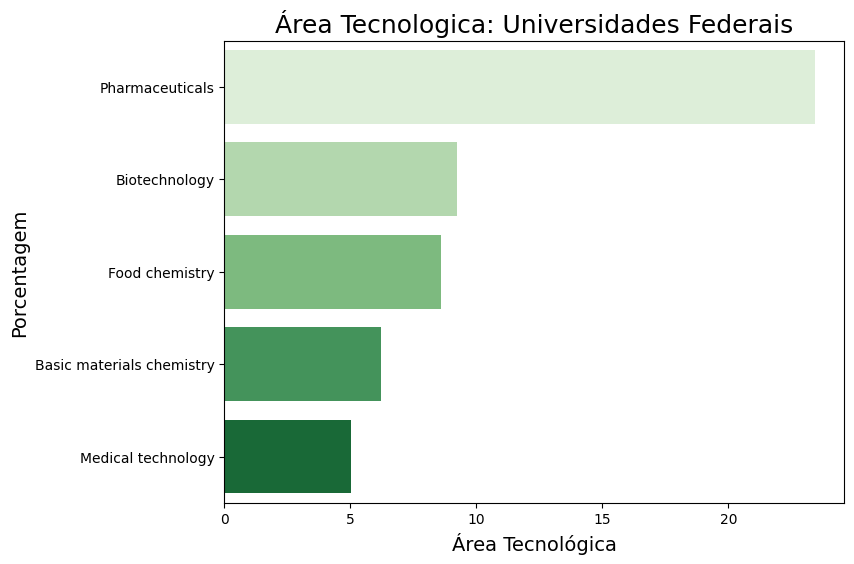

In [32]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x="Porcentagem", y="Area", 
            hue="Area", data=area_tecnologicaUV.head(5), 
            palette="Greens") 
  
plt.ylabel("Área Tecnológica", size=14) 
plt.xlabel("Porcentagem", size=14) 
plt.title("Área Tecnologica: Universidades Federais", size=18)

### Área Tecnológica: Institutos Federais Brasileiros